In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [73]:
data = pd.read_csv("./Testdata.csv")
data.head()

C:\Users\prith\AppData\Local\Temp\ipykernel_11268\3152035066.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("./Testdata.csv")


,tradeId,regulator,version,assetClass,clDateTime,clStatus,cflag,eFlag,cDateTime,method,...,seller,endDate,sType,Product,price,terminationDate,party,PartyId,transactionType,Reporting Status
0,1,SEBI,1,FX,2023-07-18T11:47:26.075000Z,True,FULLY,False,2023-12-10T07:37:58.548000Z,NonElectronic,...,Party1,2023-05-26T05:23:44.110000Z,Cash,Swap,NaN,2023-07-02T04:01:17.940000Z,PartyZ,1,EXIT,Failed Ack
1,2,SEBI,9,FX,2023-08-02T03:12:48.207000Z,False,FULLY,False,2023-10-03T22:32:10.991000Z,NotConfirmed,...,Party2,2023-07-23T23:43:15.460000Z,Cash,Swap,NaN,2023-08-15T13:25:45.442000Z,PartyX,4,EXIT,ACK
2,3,SEBI,8,FX,2023-05-09T07:42:36.475000Z,False,FULLY,False,2023-03-09T20:32:31.302000Z,NonElectronic,...,Party2,2023-08-08T11:13:43.217000Z,Physical,Swap,NaN,2023-07-07T02:03:20.354000Z,PartyX,4,TRADE,Processing Error
3,4,SEBI,1,FX,2023-10-01T05:02:54.209000Z,False,FULLY,True,2023-11-21T06:53:09.983000Z,Electronic,...,Party2,2023-07-31T19:30:37.266000Z,Cash,forward,91773.25433,2023-08-02T04:55:34.632000Z,PartyK,2,TRADE,Acknowledged
4,5,SEBI,1,FX,2023-01-23T20:53:01.076000Z,True,ONEWAY,False,2023-08-05T17:06:08.895000Z,Electronic,...,Party1,2023-12-04T19:38:57.326000Z,Cash,Swap,NaN,2023-02-08T06:49:44.186000Z,PartyX,4,TRADE,Acknowledged


In [74]:
data.dtypes

tradeId               int64
regulator            object
version               int64
assetClass           object
clDateTime           object
clStatus               bool
cflag                object
eFlag                  bool
cDateTime            object
method               object
rate                float64
expirationDate       object
eventT               object
mType                object
Timestamp            object
quantity             object
seller               object
endDate              object
sType                object
Product              object
price               float64
terminationDate      object
party                object
PartyId               int64
transactionType      object
Reporting Status     object
dtype: object

In [202]:
def impure(df):
    for i in df:
        if df[i].dtype == object:
            print(i,": ", df[i].unique())
            print()
impure(data)

regulator :  ['SEBI']

assetClass :  ['FX']

cflag :  ['FULLY' 'ONEWAY' 'UNCOLLATERALIZED']

method :  ['NonElectronic' 'NotConfirmed' 'Electronic']

eventT :  ['Error' 'NovationTrade' 'Exercise' 'Trade' 'Amendment' 'Compression'
 'Novation' 'PartialExercise' 'Termination']

mType :  ['Realtime' 'Snapshot']

seller :  ['Party1' 'Party2']

sType :  ['Cash' 'Physical']

Product :  ['Swap' 'forward' 'Cash' 'Option']

party :  ['PartyZ' 'PartyX' 'PartyK' 'PartyY' 'PartyL']

transactionType :  ['EXIT' 'TRADE']

Reporting Status :  ['Failed Acknowledgement' 'Acknowledged' 'Error' 'Ignored']



### Impure columns: cflag, method, eventT, mType, quantity, transactionType and Reporting Status.
### Lets handle the impurities

In [76]:
data["cflag"].unique()

array(['FULLY', 'ONEWAY', 'F', 'UNCOLLATERALIZED', 'UN', 'OW'],
      dtype=object)

In [77]:
data["cflag"] = data["cflag"].replace({"F":"FULLY", "OW":"ONEWAY", "UN":"UNCOLLATERALIZED"})
data["cflag"].unique()

array(['FULLY', 'ONEWAY', 'UNCOLLATERALIZED'], dtype=object)

In [78]:
data["method"].unique()

array(['NonElectronic', 'NotConfirmed', 'Electronic', 'Non',
       'Nn-Electronic', 'NC', 'NE', 'E'], dtype=object)

In [79]:
data["method"] = data["method"].replace({"Non":"NonElectronic",
                        "NE":"NonElectronic",
                        "Non":"NonElectronic", 
                        "Nn-Electronic":"NonElectronic",
                        "NC" : "NotConfirmed",
                        "E" : "Electronic"}
                      )
data["method"].unique()

array(['NonElectronic', 'NotConfirmed', 'Electronic'], dtype=object)

In [80]:
data["mType"].unique()

array(['Realtime', 'Snapshot', 'S', 'R'], dtype=object)

In [81]:
data["mType"] = data["mType"].replace({"S":"Snapshot",
                        "R":"Realtime"})
data["mType"].unique()

array(['Realtime', 'Snapshot'], dtype=object)

In [82]:
data["quantity"].unique()

array(['1', 'asxa', 1], dtype=object)

In [83]:
data["quantity"] = data["quantity"].replace({"1":1})
data = data.drop(data[data["quantity"] == "asxa"].index)
data["quantity"] = data["quantity"].astype("int")

data["quantity"].unique()


array([1])

In [84]:
data["transactionType"].unique()

array(['EXIT', 'TRADE', 'Exit'], dtype=object)

In [85]:
data["transactionType"] = data["transactionType"] .replace({"Exit": "EXIT"})
data["transactionType"].unique()

array(['EXIT', 'TRADE'], dtype=object)

In [86]:
data["Reporting Status"].unique()

array(['Failed Ack', 'ACK', 'Processing Error', 'Acknowledged', 'Ignored',
       'Error', 'Failed Acknowledgement'], dtype=object)

In [87]:
data["Reporting Status"] = data["Reporting Status"].replace({"Ack":"Acknowledged",
                                                             "ACK":"Acknowledged",
                                                             "Failed Ack":"Failed Acknowledgement",
                                                             "Processing Error":"Error",
                                                            })
data["Reporting Status"].unique()

array(['Failed Acknowledgement', 'Acknowledged', 'Error', 'Ignored'],
      dtype=object)

In [88]:
impure(data)

regulator :  ['SEBI']

assetClass :  ['FX']

clDateTime :  ['2023-07-18T11:47:26.075000Z' '2023-08-02T03:12:48.207000Z'
 '2023-05-09T07:42:36.475000Z' ... '2023-10-25T10:36:42.687000Z'
 '2023-09-30T05:00:55.154000Z' '2023-10-26T08:42:02.651000Z']

cflag :  ['FULLY' 'ONEWAY' 'UNCOLLATERALIZED']

cDateTime :  ['2023-12-10T07:37:58.548000Z' '2023-10-03T22:32:10.991000Z'
 '2023-03-09T20:32:31.302000Z' ... '2023-11-11T22:25:11.705000Z'
 '2023-03-03T18:26:07.135000Z' '2023-12-09T16:20:51.629000Z']

method :  ['NonElectronic' 'NotConfirmed' 'Electronic']

expirationDate :  ['2023-07-31T17:29:21.745000Z' '2023-06-19T14:16:43.339000Z'
 '2023-11-11T21:29:39.441000Z' ... '2023-01-24T06:59:35.810000Z'
 '2023-04-17T15:18:29.127000Z' '2023-07-13T18:09:26.695000Z']

eventT :  ['Error' 'NovationTrade' 'Exercise' 'Trade' 'Amendment' 'Compression'
 'Novation' 'PartialExercise' 'Termination']

mType :  ['Realtime' 'Snapshot']

Timestamp :  ['2023-10-21T21:29:50.430000Z' '2023-06-27T03:08:17.447000Z'
 '20

In [89]:
# converting null values as -1 in price column

# data["price"] = data["price"].fillna(-1)
# data["price"] 

In [90]:
data.dropna(subset=["terminationDate"], inplace=True)

In [91]:
data["clDateTime"] = pd.to_datetime(data["clDateTime"])
data["clmonth"] = data["clDateTime"].dt.month
data["clyear"] = data["clDateTime"].dt.year


In [92]:
data["cDateTime"] = pd.to_datetime(data["cDateTime"])
data["cmonth"] = data["cDateTime"].dt.month
data["cyear"] = data["cDateTime"].dt.year

In [93]:
data["expirationDate"] = pd.to_datetime(data["expirationDate"])
data["expirationMonth"] = data["expirationDate"].dt.month
data["expirationYear"] = data["expirationDate"].dt.year

In [94]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])
data["TimestampMonth"] = data["Timestamp"].dt.month
data["TimestampYear"] = data["Timestamp"].dt.year

In [95]:
data["endDate"] = pd.to_datetime(data["endDate"])
data["endDateMonth"] = data["endDate"].dt.month
data["endDateYear"] = data["endDate"].dt.year

In [96]:
data["terminationDate"] = pd.to_datetime(data["terminationDate"])
data["terminationDateMonth"] = data["terminationDate"].dt.month
data["terminationDateYear"] = data["terminationDate"].dt.year

In [115]:
data.head()

,tradeId,regulator,version,assetClass,clDateTime,clStatus,cflag,eFlag,cDateTime,method,...,cmonth,cyear,expirationMonth,expirationYear,TimestampMonth,TimestampYear,endDateMonth,endDateYear,terminationDateMonth,terminationDateYear
0,1,SEBI,1,FX,2023-07-18 11:47:26.075000+00:00,True,FULLY,False,2023-12-10 07:37:58.548000+00:00,NonElectronic,...,12,2023,7,2023,10,2023,5,2023,7,2023
1,2,SEBI,9,FX,2023-08-02 03:12:48.207000+00:00,False,FULLY,False,2023-10-03 22:32:10.991000+00:00,NotConfirmed,...,10,2023,6,2023,6,2023,7,2023,8,2023
2,3,SEBI,8,FX,2023-05-09 07:42:36.475000+00:00,False,FULLY,False,2023-03-09 20:32:31.302000+00:00,NonElectronic,...,3,2023,11,2023,1,2023,8,2023,7,2023
3,4,SEBI,1,FX,2023-10-01 05:02:54.209000+00:00,False,FULLY,True,2023-11-21 06:53:09.983000+00:00,Electronic,...,11,2023,11,2023,11,2023,7,2023,8,2023
4,5,SEBI,1,FX,2023-01-23 20:53:01.076000+00:00,True,ONEWAY,False,2023-08-05 17:06:08.895000+00:00,Electronic,...,8,2023,6,2023,10,2023,12,2023,2,2023


In [118]:
stats = pd.DataFrame()
pd.concat([stats, data["price"].describe(), data["rate"].describe()], axis = 1)

,price,rate
count,13141.000000,43791.000000
mean,502333.133036,4979.449255
std,288237.900532,2890.625860
min,108.503208,0.630700
25%,253780.917700,2473.493700
50%,502008.113700,4976.305100
75%,751058.265900,7468.071950
max,999940.821500,9999.865100


In [131]:
pd.crosstab(data['Reporting Status'], data['method'])

method,Electronic,NonElectronic,NotConfirmed
Reporting Status,,,
Acknowledged,3066,6119,3006
Error,1616,3188,1565
Failed Acknowledgement,3239,6228,3031
Ignored,3209,6350,3174


In [134]:
pd.crosstab(data['Reporting Status'], data['transactionType'])

transactionType,EXIT,TRADE
Reporting Status,,
Acknowledged,5979,6212
Error,0,6369
Failed Acknowledgement,6183,6315
Ignored,6141,6592


In [136]:
pd.crosstab(data['Reporting Status'], data['party'])

party,PartyK,PartyL,PartyX,PartyY,PartyZ
Reporting Status,,,,,
Acknowledged,1936,2080,4009,2093,2073
Error,1048,1107,2156,1015,1043
Failed Acknowledgement,1980,2114,4159,2140,2105
Ignored,2289,2116,4188,2017,2123


In [138]:
pd.crosstab(data['seller'], data['party'])

party,PartyK,PartyL,PartyX,PartyY,PartyZ
seller,,,,,
Party1,3608,3716,7101,3617,3691
Party2,3645,3701,7411,3648,3653


In [139]:
data.columns

Index(['tradeId', 'regulator', 'version', 'assetClass', 'clDateTime',
       'clStatus', 'cflag', 'eFlag', 'cDateTime', 'method', 'rate',
       'expirationDate', 'eventT', 'mType', 'Timestamp', 'quantity', 'seller',
       'endDate', 'sType', 'Product', 'price', 'terminationDate', 'party',
       'PartyId', 'transactionType', 'Reporting Status', 'clmonth', 'clyear',
       'cmonth', 'cyear', 'expirationMonth', 'expirationYear',
       'TimestampMonth', 'TimestampYear', 'endDateMonth', 'endDateYear',
       'terminationDateMonth', 'terminationDateYear'],
      dtype='object')

In [149]:
pd.crosstab(data['Reporting Status'], data['Product'])

Product,Cash,Option,Swap,forward
Reporting Status,,,,
Acknowledged,121,835,10255,980
Error,110,445,5321,493
Failed Acknowledgement,145,796,10518,1039
Ignored,490,780,10444,1019


In [168]:
pd.crosstab(data['Reporting Status'], data['eventT'])
pd.crosstab(data['party'], data['eventT'])

eventT,Amendment,Compression,Error,Exercise,Novation,NovationTrade,PartialExercise,Termination,Trade
party,,,,,,,,,
PartyK,772,818,784,819,804,751,822,851,832
PartyL,840,789,844,808,809,852,788,891,796
PartyX,1630,1594,1581,1632,1558,1613,1636,1590,1678
PartyY,801,779,803,826,774,772,807,871,832
PartyZ,829,817,802,821,835,825,810,802,803


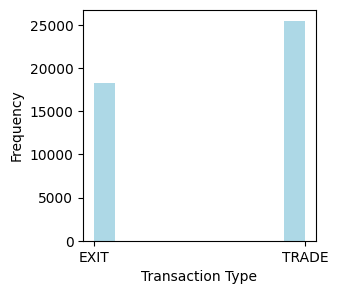

In [29]:
plt.figure(figsize=(3,3))
plt.hist(data["transactionType"], color = "lightblue")
plt.xlabel("Transaction Type")
plt.ylabel("Frequency")
plt.show()

In [30]:
data.columns

Index(['tradeId', 'regulator', 'version', 'assetClass', 'clDateTime',
       'clStatus', 'cflag', 'eFlag', 'cDateTime', 'method', 'rate',
       'expirationDate', 'eventT', 'mType', 'Timestamp', 'quantity', 'seller',
       'endDate', 'sType', 'Product', 'price', 'terminationDate', 'party',
       'PartyId', 'transactionType', 'Reporting Status', 'clmonth', 'clyear',
       'cmonth', 'cyear', 'expirationMonth', 'expirationYear',
       'TimestampMonth', 'TimestampYear', 'endDateMonth', 'endDateYear',
       'terminationDateMonth', 'terminationDateYear'],
      dtype='object')

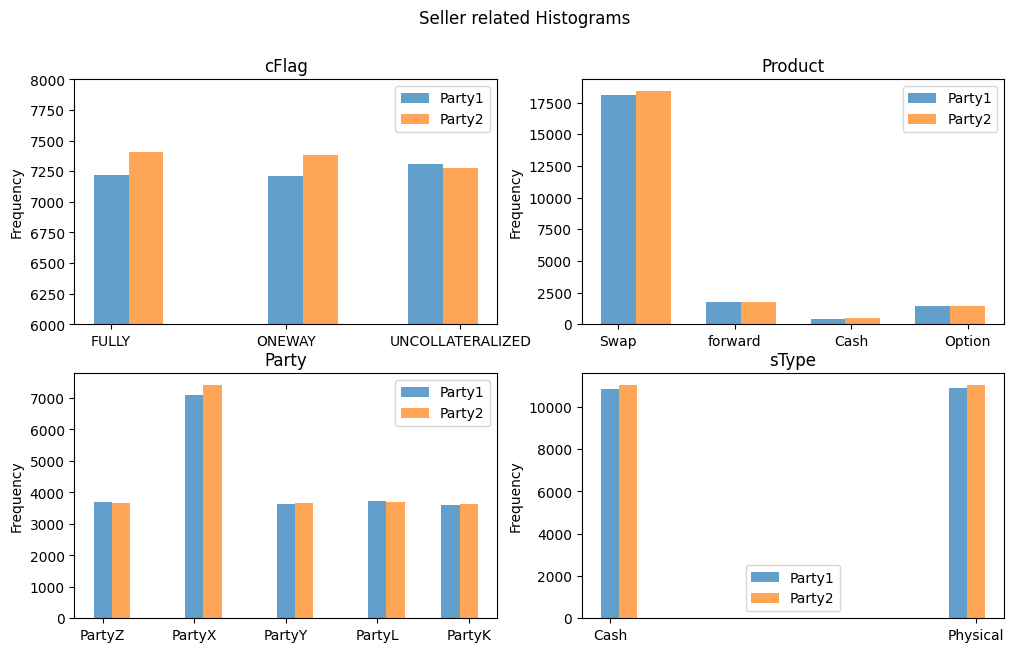

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 7))

axs[0][0].set_ylim(6000, 8000)
axs[0][0].hist(data[data["seller"] == "Party1"]["cflag"], alpha=0.7, label="Party1", align='left' )
axs[0][0].hist(data[data["seller"] == "Party2"]["cflag"], alpha=0.7, label="Party2", align='right')
axs[0][0].set_ylabel("Frequency")
axs[0][0].set_title("cFlag")


axs[0][1].hist(data[data["seller"] == "Party1"]["Product"], alpha=0.7, label="Party1", align='left' )
axs[0][1].hist(data[data["seller"] == "Party2"]["Product"], alpha=0.7, label="Party2", align='right')
axs[0][1].set_ylabel("Frequency")
axs[0][1].set_title("Product")

axs[1][0].hist(data[data["seller"] == "Party1"]["party"], alpha=0.7, label="Party1", align='left', bins = 20 )
axs[1][0].hist(data[data["seller"] == "Party2"]["party"], alpha=0.7, label="Party2", align='right', bins = 20)
axs[1][0].set_ylabel("Frequency")
axs[1][0].set_title("Party")

axs[1][1].hist(data[data["seller"] == "Party1"]["sType"], alpha=0.7, label="Party1", align='left', bins = 20 )
axs[1][1].hist(data[data["seller"] == "Party2"]["sType"], alpha=0.7, label="Party2", align='right', bins = 20)
axs[1][1].set_ylabel("Frequency")
axs[1][1].set_title("sType")


axs[0][0].legend()
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
plt.suptitle('Seller related Histograms')
plt.show()

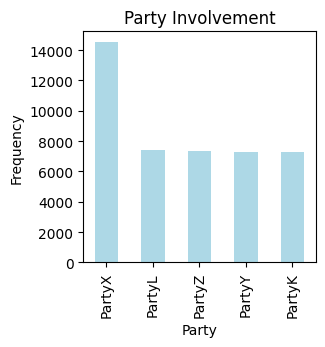

In [32]:
party_counts = data['party'].value_counts()
plt.figure(figsize=(3, 3))
party_counts.plot(kind='bar', color='lightblue')
plt.title('Party Involvement')
plt.xlabel('Party')
plt.ylabel('Frequency')

plt.show()

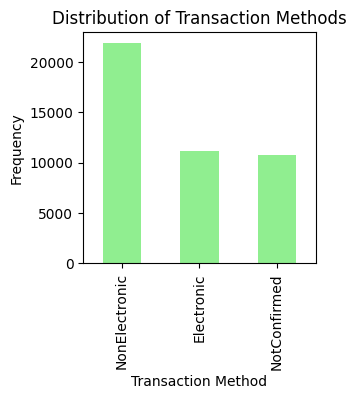

In [33]:
transaction_method_counts = data['method'].value_counts()
plt.figure(figsize=(3,3))
transaction_method_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Transaction Methods')
plt.xlabel('Transaction Method')
plt.ylabel('Frequency')
plt.show()

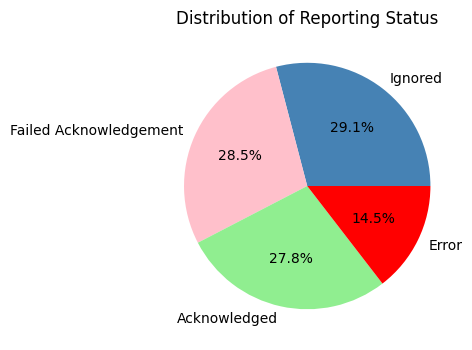

In [34]:
plt.figure(figsize=(4,4))
plt.pie(data['Reporting Status'].value_counts(), labels=data['Reporting Status'].value_counts().index, autopct='%1.1f%%', colors=["steelblue", "pink", "lightgreen", "red"])
plt.title('Distribution of Reporting Status')
plt.show()

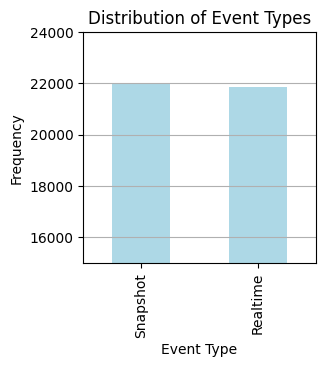

In [35]:
event_type_counts = data['mType'].value_counts()
plt.figure(figsize=(3,3))
event_type_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Frequency')
plt.ylim(15000, 24000)
plt.grid(axis='y')
plt.show()

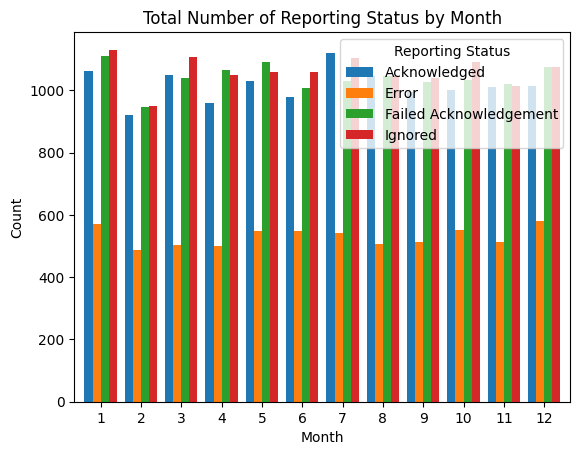

In [37]:
monthly_reporting_status_counts = data.groupby(['clmonth', 'Reporting Status']).size().unstack()

monthly_reporting_status_counts.plot(kind='bar', width=0.8)
plt.title('Total Number of Reporting Status by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Reporting Status')
plt.show()

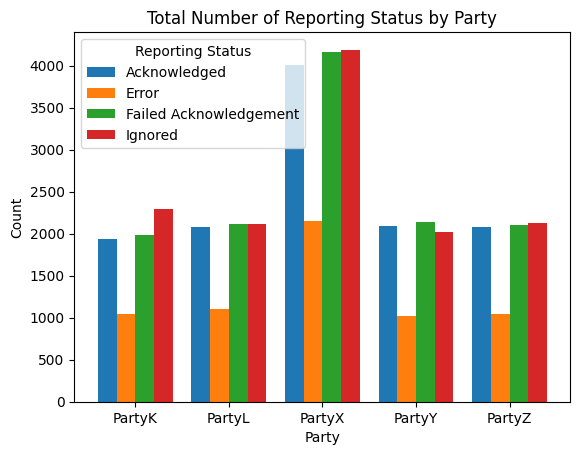

In [38]:
seller_reporting_status_counts = data.groupby(['party', 'Reporting Status']).size().unstack()
seller_reporting_status_counts.plot(kind='bar', width=0.8)
plt.title('Total Number of Reporting Status by Party')
plt.xlabel('Party')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Reporting Status')
plt.show()

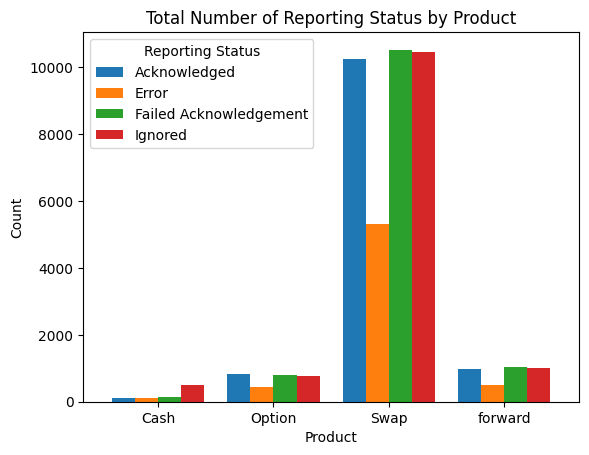

In [53]:
product_reporting_status_counts = data.groupby(['Product', 'Reporting Status']).size().unstack()
product_reporting_status_counts.plot(kind='bar', width=0.8)
plt.title('Total Number of Reporting Status by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Reporting Status')
plt.show()

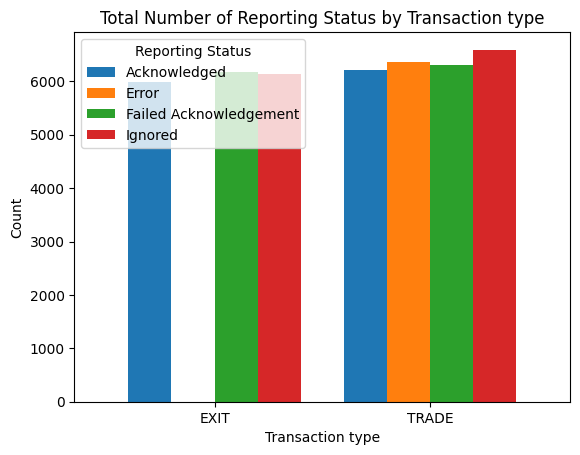

In [40]:
transactionType_reporting_status_counts = data.groupby(['transactionType', 'Reporting Status']).size().unstack()
transactionType_reporting_status_counts.plot(kind='bar', width=0.8)
plt.title('Total Number of Reporting Status by Transaction type')
plt.xlabel('Transaction type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Reporting Status')
plt.show()

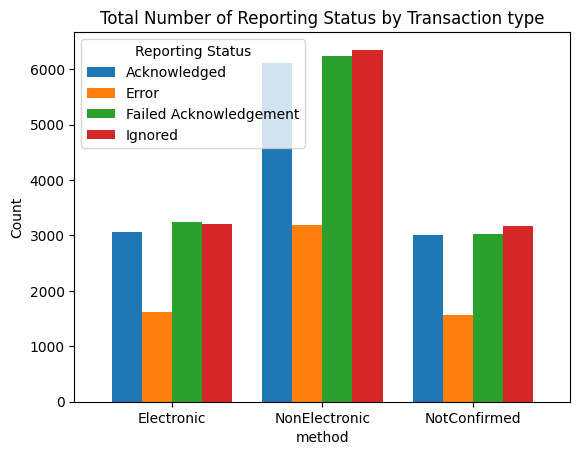

In [56]:
method_reporting_status_counts = data.groupby(['method', 'Reporting Status']).size().unstack()
method_reporting_status_counts.plot(kind='bar', width=0.8)
plt.title('Total Number of Reporting Status by Transaction type')
plt.xlabel('method')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Reporting Status')
plt.show()

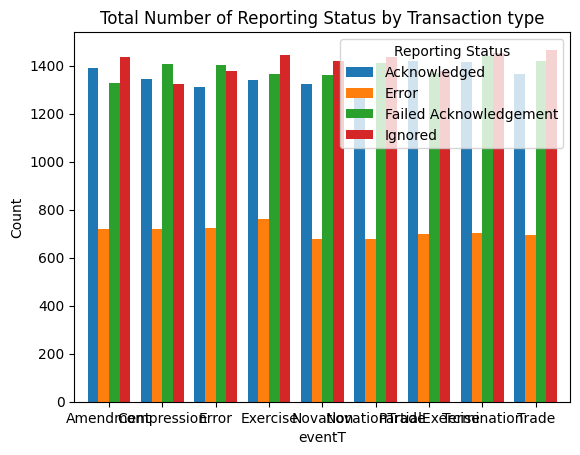

In [446]:
df.columns

Index(['version', 'clStatus', 'cflag', 'eFlag', 'method', 'rate', 'eventT',
       'mType', 'seller', 'sType', 'Product', 'PartyId', 'transactionType',
       'Reporting Status', 'clmonth', 'clyear', 'cmonth', 'cyear',
       'expirationMonth', 'expirationYear', 'TimestampMonth', 'TimestampYear',
       'endDateMonth', 'endDateYear', 'terminationDateMonth',
       'terminationDateYear'],
      dtype='object')

## Lets make a data frame to make classification model

In [467]:
df = data.copy()
df.head()

,tradeId,regulator,version,assetClass,clDateTime,clStatus,cflag,eFlag,cDateTime,method,...,cmonth,cyear,expirationMonth,expirationYear,TimestampMonth,TimestampYear,endDateMonth,endDateYear,terminationDateMonth,terminationDateYear
0,1,SEBI,1,FX,2023-07-18 11:47:26.075000+00:00,True,FULLY,False,2023-12-10 07:37:58.548000+00:00,NonElectronic,...,12,2023,7,2023,10,2023,5,2023,7,2023
1,2,SEBI,9,FX,2023-08-02 03:12:48.207000+00:00,False,FULLY,False,2023-10-03 22:32:10.991000+00:00,NotConfirmed,...,10,2023,6,2023,6,2023,7,2023,8,2023
2,3,SEBI,8,FX,2023-05-09 07:42:36.475000+00:00,False,FULLY,False,2023-03-09 20:32:31.302000+00:00,NonElectronic,...,3,2023,11,2023,1,2023,8,2023,7,2023
3,4,SEBI,1,FX,2023-10-01 05:02:54.209000+00:00,False,FULLY,True,2023-11-21 06:53:09.983000+00:00,Electronic,...,11,2023,11,2023,11,2023,7,2023,8,2023
4,5,SEBI,1,FX,2023-01-23 20:53:01.076000+00:00,True,ONEWAY,False,2023-08-05 17:06:08.895000+00:00,Electronic,...,8,2023,6,2023,10,2023,12,2023,2,2023


In [468]:
# Removing unncessary data/columns
df = df.drop(["rate", "tradeId", "regulator", "assetClass", "clDateTime", "cDateTime", "expirationDate", "Timestamp", "quantity", "endDate", "terminationDate", "party", "price", 'clmonth', 'clyear', 'cmonth', 'cyear', 'expirationMonth', 'expirationYear', 'TimestampMonth', 'TimestampYear', 'endDateMonth', 'endDateYear', 'terminationDateMonth', 'terminationDateYear', "clStatus"], axis = "columns")
df.head()

,version,cflag,eFlag,method,eventT,mType,seller,sType,Product,PartyId,transactionType,Reporting Status
0,1,FULLY,False,NonElectronic,Error,Realtime,Party1,Cash,Swap,1,EXIT,Failed Acknowledgement
1,9,FULLY,False,NotConfirmed,NovationTrade,Snapshot,Party2,Cash,Swap,4,EXIT,Acknowledged
2,8,FULLY,False,NonElectronic,NovationTrade,Realtime,Party2,Physical,Swap,4,TRADE,Error
3,1,FULLY,True,Electronic,Exercise,Realtime,Party2,Cash,forward,2,TRADE,Acknowledged
4,1,ONEWAY,False,Electronic,Trade,Snapshot,Party1,Cash,Swap,4,TRADE,Acknowledged


In [469]:
# Encoding text data (object/bool data)

df1 = pd.get_dummies(df, columns = ["cflag", "method", "eventT", "mType", "seller", "sType", "Product", "transactionType", "eFlag"], dtype = "int")
df1.head()

,version,PartyId,Reporting Status,cflag_FULLY,cflag_ONEWAY,cflag_UNCOLLATERALIZED,method_Electronic,method_NonElectronic,method_NotConfirmed,eventT_Amendment,...,sType_Cash,sType_Physical,Product_Cash,Product_Option,Product_Swap,Product_forward,transactionType_EXIT,transactionType_TRADE,eFlag_False,eFlag_True
0,1,1,Failed Acknowledgement,1,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
1,9,4,Acknowledged,1,0,0,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
2,8,4,Error,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,1,0
3,1,2,Acknowledged,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,1
4,1,4,Acknowledged,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,1,1,0


In [470]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dir(encoder)
labeled_target = pd.DataFrame(encoder.fit_transform(df1["Reporting Status"]), columns = ["Reporting Status"])
df2 = df1.drop(["Reporting Status"], axis = 1)
df2
x = df2
y = labeled_target
x.head()

,version,PartyId,cflag_FULLY,cflag_ONEWAY,cflag_UNCOLLATERALIZED,method_Electronic,method_NonElectronic,method_NotConfirmed,eventT_Amendment,eventT_Compression,...,sType_Cash,sType_Physical,Product_Cash,Product_Option,Product_Swap,Product_forward,transactionType_EXIT,transactionType_TRADE,eFlag_False,eFlag_True
0,1,1,1,0,0,0,1,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,9,4,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,1,0,1,0
2,8,4,1,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3,1,2,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1
4,1,4,0,1,0,1,0,0,0,0,...,1,0,0,0,1,0,0,1,1,0


In [471]:
x.columns

Index(['version', 'PartyId', 'cflag_FULLY', 'cflag_ONEWAY',
       'cflag_UNCOLLATERALIZED', 'method_Electronic', 'method_NonElectronic',
       'method_NotConfirmed', 'eventT_Amendment', 'eventT_Compression',
       'eventT_Error', 'eventT_Exercise', 'eventT_Novation',
       'eventT_NovationTrade', 'eventT_PartialExercise', 'eventT_Termination',
       'eventT_Trade', 'mType_Realtime', 'mType_Snapshot', 'seller_Party1',
       'seller_Party2', 'sType_Cash', 'sType_Physical', 'Product_Cash',
       'Product_Option', 'Product_Swap', 'Product_forward',
       'transactionType_EXIT', 'transactionType_TRADE', 'eFlag_False',
       'eFlag_True'],
      dtype='object')

In [473]:
# Scaling values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols = ['version', 'PartyId', 'cflag_FULLY', 'cflag_ONEWAY', 'cflag_UNCOLLATERALIZED', 'method_Electronic', 'method_NonElectronic', 'method_NotConfirmed', 'eventT_Amendment', 'eventT_Compression', 'eventT_Error', 'eventT_Exercise', 'eventT_Novation', 'eventT_NovationTrade', 'eventT_PartialExercise', 'eventT_Termination', 'eventT_Trade', 'mType_Realtime', 'mType_Snapshot', 'seller_Party1', 'seller_Party2', 'sType_Cash', 'sType_Physical', 'Product_Cash', 'Product_Option', 'Product_Swap', 'Product_forward', 'transactionType_EXIT', 'transactionType_TRADE', 'eFlag_False', 'eFlag_True']


x[cols] = scaler.fit_transform(x[cols])
x.head()

,version,PartyId,cflag_FULLY,cflag_ONEWAY,cflag_UNCOLLATERALIZED,method_Electronic,method_NonElectronic,method_NotConfirmed,eventT_Amendment,eventT_Compression,...,sType_Cash,sType_Physical,Product_Cash,Product_Option,Product_Swap,Product_forward,transactionType_EXIT,transactionType_TRADE,eFlag_False,eFlag_True
0,0.000,0.00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.000,0.75,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.875,0.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.000,0.25,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.000,0.75,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [474]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.05)

In [493]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
model =  DecisionTreeClassifier()
model.fit(x_train, y_train)

pd.DataFrame(model.predict(x_test), columns = ["predictions"])

,predictions
0,3
1,2
2,0
3,1
4,0
...,...
2185,3
2186,0
2187,2
2188,1
